In [2]:
from IPython.display import Image

##  선형회귀는 잔차의 제곱합을 최소화하는 방법으로 결정

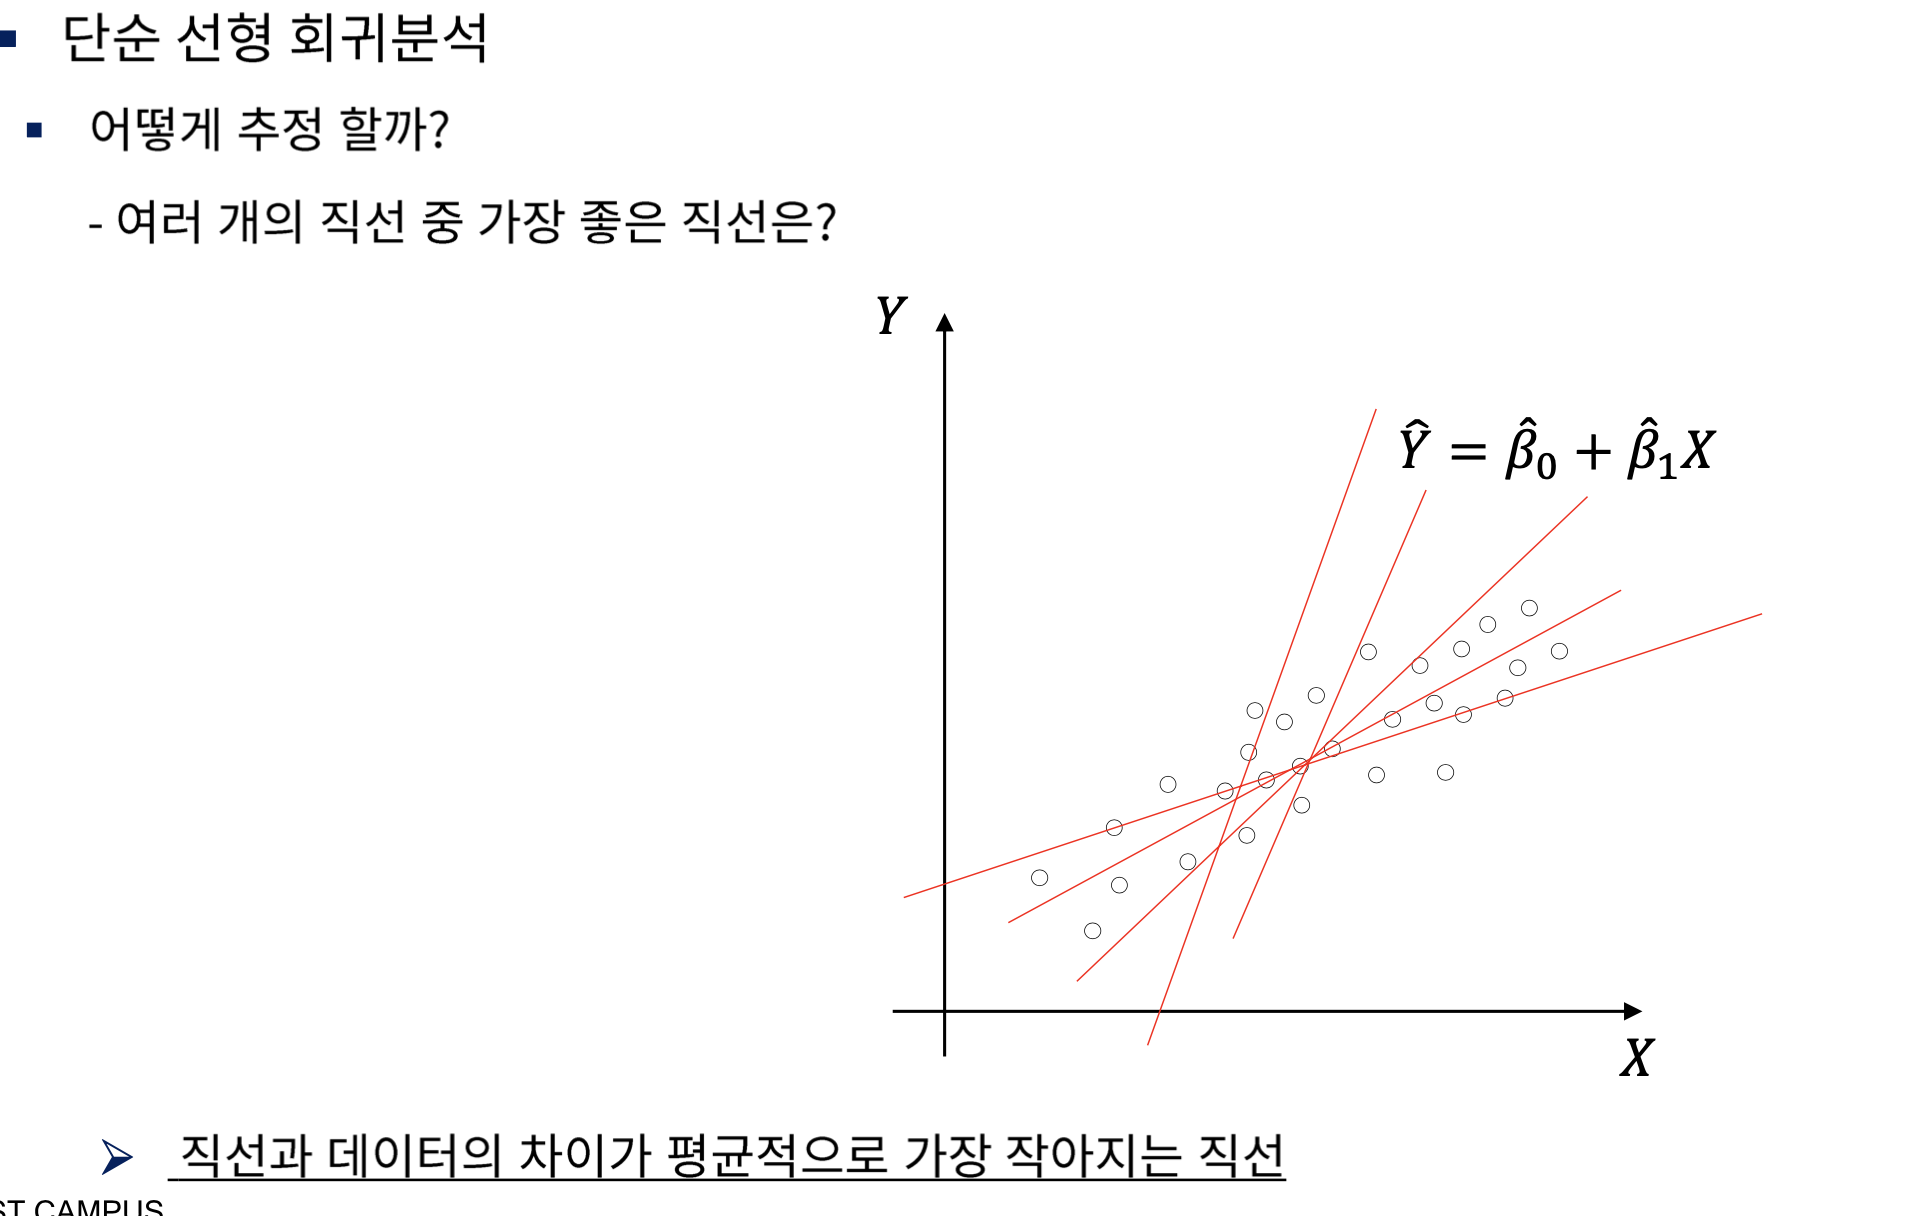

In [3]:
Image("/Users/leejunseung/Desktop/regression.png")

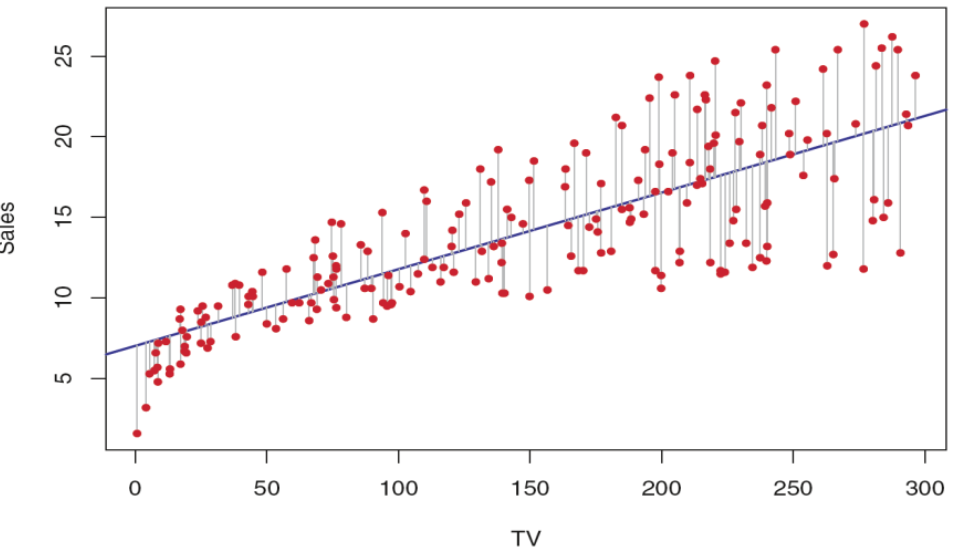

In [4]:
Image("/Users/leejunseung/Desktop/residual.png")

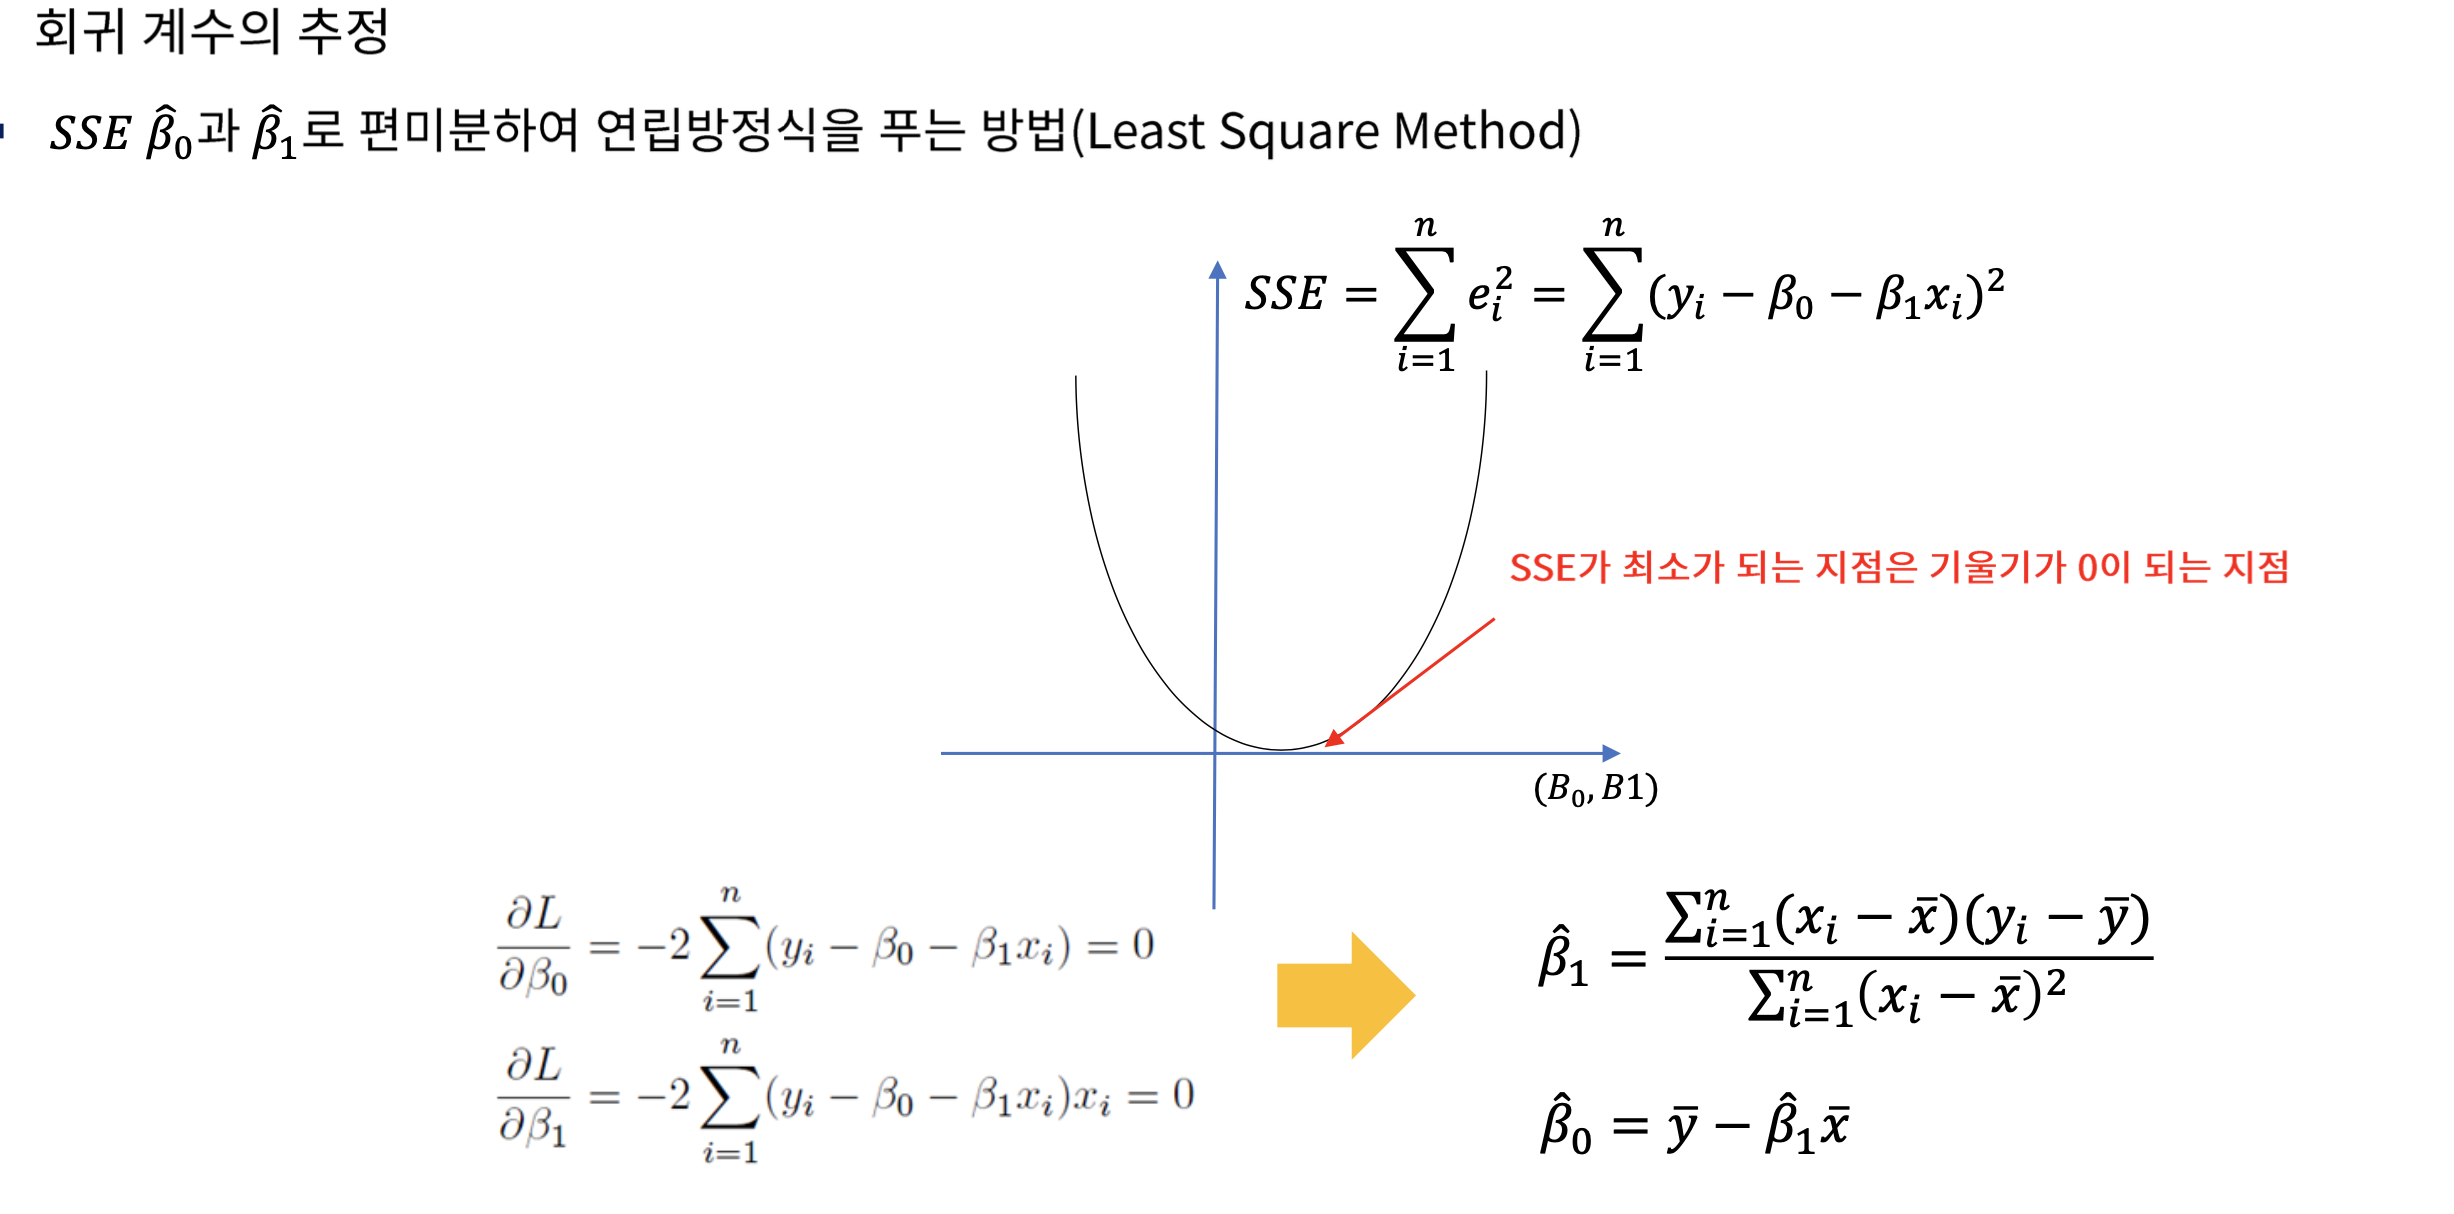

In [5]:
Image("/Users/leejunseung/Desktop/gradient descent.png")

 ## 경사하강법 구현 

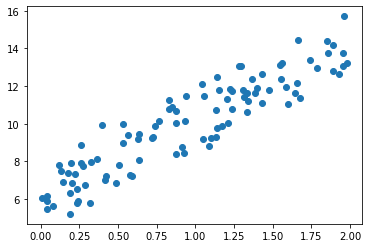

In [6]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
#y=4x + 6을 근사 , 임의의 값은 노이즈를 위해 만듦
X = 2*np.random.rand(100,1) #0~1사이 균일분포 표준정규분포 난수를 matrix array(100,1)생성.
y=6+4*X+np.random.randn(100,1) #평균 0 표준편차1의 가우시안 표준정규분포 난수를 matrix array(100,1)생성

plt.scatter(X,y)

In [7]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [8]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))   
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

In [9]:
# get_weight_updates()를 경사 하강 방식으로 반복적으로 수행하여 w1,w0를 업데이트 하는 함수인
# gradient_descent_steps() 함수를 생성


# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [10]:
# gradient_descent_steps()를 호출해 w1과 w0를 구해보자.
#예측 값과 실제값의 RSS(SSE) 차이를 계산하는 get_cost()함수를 생성하고 이를 이용해 경사 하강법의 예측오류도 계산 

def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


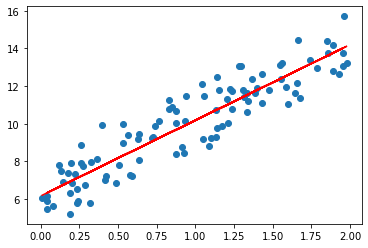

In [11]:
plt.scatter(X, y)
plt.plot(X,y_pred,c='r')

## 확률적 경사하강법

> 일반적으로 경사 하강법은 모든 학습 데터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트 > 시간이 오래걸ㅣㅁ

> 일부 데이터만 이용해 w업데이트 방식.

In [12]:
#gradient_descent_steps()와 비슷하나, X,y 데이터에서 랜덤하게 batch_size만큼 데이터 추출.

def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index=0
    
    for ind in range(iters):
        np.random.seed(ind) #계속 바뀜
        #전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X,sample_y로 저장.
        stochastic_random_index = np.random.permutation(X.shape[0])#permutation 무작위로 섞는다.
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update,w0_update = get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1,w0

In [13]:
w1,w0 = stochastic_gradient_descent_steps(X,y,iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]*X + w0
print("stochastic_gradient_descent total cost: {:.4f}".format(get_cost(y,y_pred)))

w1:4.028 w0:6.156
stochastic_gradient_descent total cost: 0.9937


## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격예측.

> LinearRegression 클래스는 예측값과 실제값의 차이를 최소화해 OLS(Ordinary Least Squares , 최소자승법)추정 방식으로 구현한 클래스. (잔차의 최소화)

> OLS기반의 회귀계수 계산은 피처의 독립성에 많은 영향, 피처간의 상관관계가 높은 경우 분산이 매우 커져서 오류에 민감.  < 다중공선성

### 회귀 평가 지표

> MAE(Mean Absoulte Error) 실제 값과 예측값의 차이를 절댓값으로 반환해 평균 
 
> MSE(Mean Squared Error) 실제값과 예측값의 차이를 제곱해 평균 

> R-squard 예측값 분산 / 실제값 분산  > 1에 가까울수록 예측 정확도 높다.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

#boston 데이터 세트 로드 
boston = load_boston()


#dataframe 으로 변화
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
boston_df['Target'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


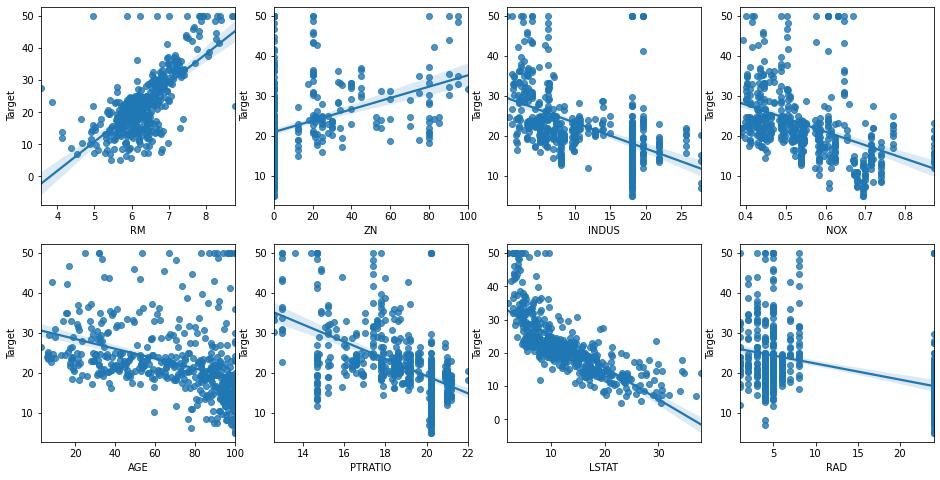

In [17]:
#seaborn의 regplot()은 XY축 값의 산점도와 함께 선형 회귀 직선을 그어준다.

# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='Target',data=boston_df , ax=axs[row][col])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = boston_df['Target']
X_data = boston_df.drop(['Target'],axis=1,inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.3,random_state=777)

#선형 회귀 OLS로 학습/예측/평가 수행 
lr = LinearRegression()
lr.fit(X_train,y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 25.348 , RMSE : 5.035
Variance score : 0.700


In [19]:
print("절편 값 : ",lr.intercept_)
print("회귀 계수 값 : ",np.round(lr.coef_,1))

절편 값 :  46.129614606650044
회귀 계수 값 :  [ -0.1   0.   -0.    3.1 -24.5   3.3   0.   -1.7   0.3  -0.   -1.    0.
  -0.6]


### 회귀계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의

In [20]:
coeff = pd.Series(data=np.round(lr.coef_,1),index = X_data.columns)
coeff.sort_values(ascending=False)

RM          3.3
CHAS        3.1
RAD         0.3
ZN          0.0
INDUS      -0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -1.0
DIS        -1.7
NOX       -24.5
dtype: float64

#### RM이 양의 값으로 회귀계수가 가장 크며, NOX 피처의 회귀 계수 - 값이 너무 커 보인다.  > 최적화 진행 > coefficients의 변화

In [21]:
from sklearn.model_selection import cross_val_score

y_target = boston_df['Target']
x_data = boston_df.drop(['Target'],axis=1)
lr = LinearRegression()

#cross_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


## 다항 회귀와 과적합/과소적합 이해

In [22]:
# PolynomialFeatures를 이용해 단항값을 2차 다항값으로 변환해보자.

from sklearn.preprocessing import PolynomialFeatures
import numpy as np 

#다항식으로 변환한 단항식 생성, [[0,1],[2,3]] 의 2by2 행렬 생성.
X = np.arange(4).reshape(2,2)
print("일차 단항식 계수 피쳐:\n",X)

#degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures 이용.
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print("변환된 2차 다항식 계수 피처:\n",poly_ftr)

일차 단항식 계수 피쳐:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [23]:
#3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성. 즉 회귀식은 결정값 y = 1+ 2x_1 + 3x_1^2 + 4x_2^3

def polynomial_func(X):
    y = 1+2*X+X**2+X**3
    
    return y

X = np.arange(4).reshape(2,2)
print("일차 단항식 계수값\n",X)
y = polynomial_func(X)
print("삼차 다항식 결정값 :\n",y)

일차 단항식 계수값
 [[0 1]
 [2 3]]
삼차 다항식 결정값 :
 [[ 1  5]
 [17 43]]


In [24]:
from sklearn.linear_model import LinearRegression
#3차 다항식 변환.
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print("3차 다항식 계수 feature:\n",poly_ftr)

#선형 회귀에 3차 다항식 계수 피처와 3차 다항식 결정 값으로 학습 후 회귀 계수 확인.
model = LinearRegression()
model.fit(poly_ftr,y)

print("Polynomial 회귀 계수\n",np.round(model.coef_,2))
print("Polynomial 회귀 Shape",model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Polynomial 회귀 Shape (2, 10)


## 다항회귀를 이용한 보스턴 주택가격 예측

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_boston
import numpy as np 
import pandas as pd


boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)

boston_df['PRICE'] = boston.target
print("Boston 데이터셋 크기",boston_df.shape)

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'],axis=1,inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.3,random_state=777)

#Pipeline 이용하여 PolynomailFeatures 적용을 순차적으로 결합 .
p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                  ('linear', LinearRegression())])


p_model.fit(X_train,y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print("MSE : {:.3f}, RMSE {:.3f}".format(mse,rmse))
print("Variance score {:.3f}".format(r2_score(y_test,y_preds)))

Boston 데이터셋 크기 (506, 14)
MSE : 52988.636, RMSE 230.193
Variance score -626.032


## 다항 회귀를 이용한 과소적합 및 과적합 이해 

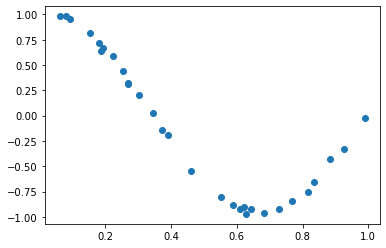

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#임의의 값으로 구성된 x값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

#X는 0부터 1까지 30개의 random값을 순서대로 sampling 한 데이터.
np.random.seed(777)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

#y값은 cosine 기반의 true_fun()에서 약간의 Noise 변동값을 더한 값.
y = true_fun(X) + np.random.rand(n_samples)*0.1

plt.scatter(X,y)


### 예측 결과를 비교할 다항식 차수를 각각 1,4,15로 변경하면서 예측결과 비교.


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.31 입니다.

Degree 4 회귀 계수는 [  3. -26.  35. -13.] 입니다.
Degree 4 MSE 는 0.00 입니다.

Degree 15 회귀 계수는 [-6.87000000e+02  1.82130000e+04 -2.74145000e+05  2.63408400e+06
 -1.72467870e+07  8.00342330e+07 -2.69702527e+08  6.69168357e+08
 -1.22864629e+09  1.66329752e+09 -1.63700365e+09  1.13788275e+09
 -5.29039199e+08  1.47523801e+08 -1.86456890e+07] 입니다.
Degree 15 MSE 는 281202.54 입니다.


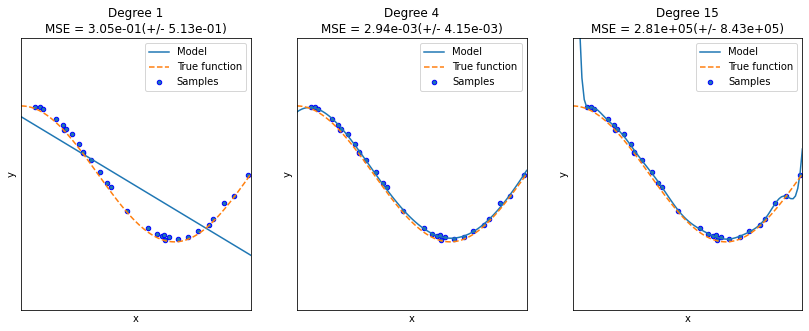

In [27]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수(degree)를 1, 4, 5로 각각 변화시키면서 비교.

for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees),i+1)
    plt.setp(ax,xticks=(),yticks=())
    
    ## 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    #교차 검증으로 다항 회귀를 평가.
    #Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출.
    
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

### Bias - Variance Trade off 

> 일반적으로 편향과 분산은 한쪽이 높으면 한 쪽이 낮아지는 경향이 있다. 

> 편향이 높으면 분산은 낮아지고(과소적합) 반대로 분산이 높으면 편향이 낮아진다.(과적합)

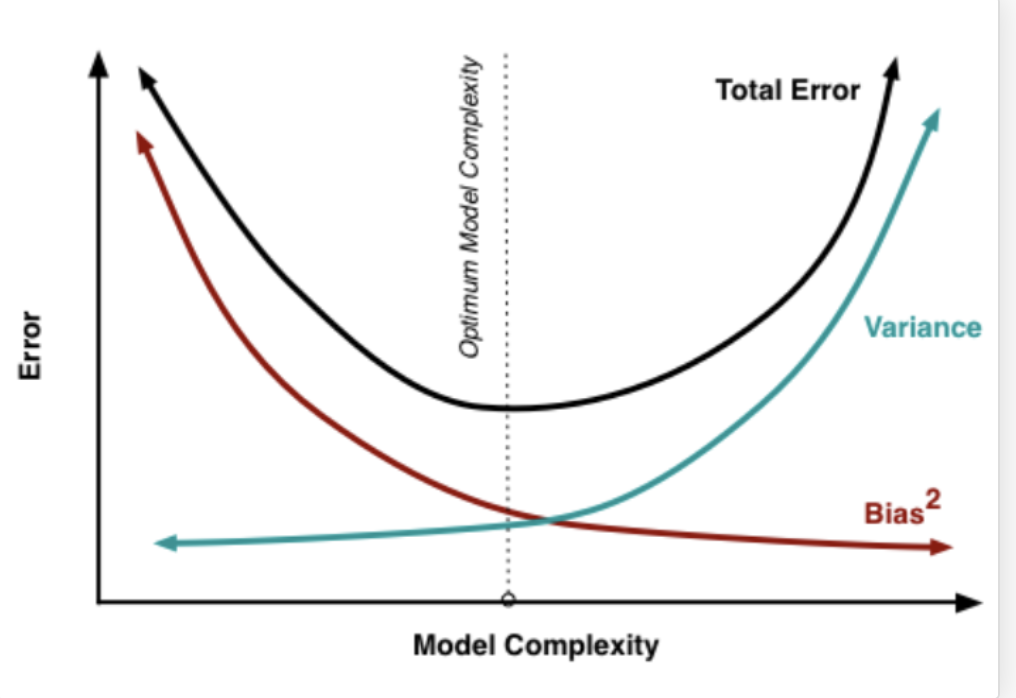

In [28]:
Image("/Users/leejunseung/Desktop/tradeoff.png")

## 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#alpha =10 으로 설정해 릿지 회귀 수행.

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("5 folds의 개별 Negative MSE scores:",np.round(neg_mse_scores,3))
print("5 folds의 개별 RMSE scores:",np.round(rmse_scores,3))
print("5 folds의 평균 RMSE: {:.3f}".format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE: 5.518


In [30]:
#Ridge에 사용될 alpha 값들의 변화.

alphas = [0,0.1,1,10,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print("alpha {}일때 5 folds의 평균 RMSE : {:.3f}".format(alpha,avg_rmse))

alpha 0일때 5 folds의 평균 RMSE : 5.829
alpha 0.1일때 5 folds의 평균 RMSE : 5.788
alpha 1일때 5 folds의 평균 RMSE : 5.653
alpha 10일때 5 folds의 평균 RMSE : 5.518
alpha 100일때 5 folds의 평균 RMSE : 5.330


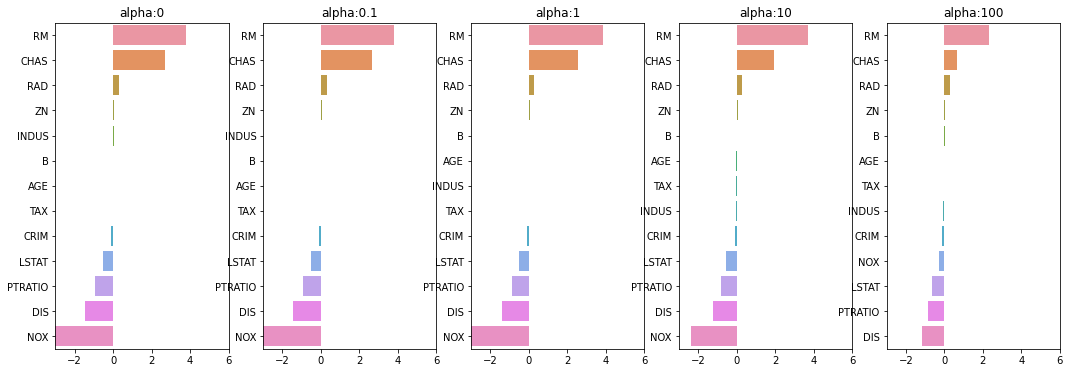

In [31]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성.
fig,axs = plt.subplots(figsize=(18,6),nrows=1,ncols=5)
#각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성.
coeff_df = pd.DataFrame()

#alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정.
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data,y_target)
    #alpha에 따른 피처별로 회귀 계수를 Series로 반환하고 이를 DataFrame의 칼럼으로 추가.
    coeff = pd.Series(data=ridge.coef_,index=X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    
    
    #막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현.
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values,y=coeff.index,ax=axs[pos])
    
#for문 바깥에서 맷풀롯립의 show 호출 및 alpha에 다른 피처 회귀 계수를 DataFrame으로 표시.
plt.show()


### alpha 값을 증가시킬수록 회귀 계수 값은 지속적으로 작아짐을 알 수 있다.

> DataFrame에 저장된 alpha 값의 변화에 따른 릿지 회귀 계수 값을 구해보자.

> alpha값이 증가하면서 회귀 계수가 지속적으로 작아지지만 릿지 회귀의 경우에는 회귀계수를 0을 만들지는 않는다.

In [32]:
ridge_alphas = [0,0.1,1,10,100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column,ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


## Lasso 회귀

In [51]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': 
            model = Ridge(alpha=param)
        elif model_name =='Lasso': 
            model = Lasso(alpha=param)
        elif model_name =='ElasticNet': 
            model = ElasticNet(alpha=param, l1_ratio=0.7)
            
        neg_mse_scores = cross_val_score(model, X_data_n,y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data , y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
        
    return coeff_df
# end of get_linear_regre_eval

In [52]:
lasso_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso',params=lasso_alphas,X_data_n=X_data,y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [53]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [54]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [55]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


## Logistic Regression

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, roc_auc_score

cancer = load_breast_cancer()

scaler = StandardScaler()

data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_preds = lr_clf.predict(X_test)

print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy: 0.977
roc_auc: 0.972


In [64]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


/Users/leejunseung/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/leejunseung/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/leejunseung/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/leejunseung/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/leejunseung/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_se